In [2]:
!pip install keras-tuner -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 10.3 MB/s eta 0:00:00


In [3]:
!pip install tabulate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression
import keras_tuner
from tabulate import tabulate

In [6]:
df = pd.read_csv(".../CarPrice_Assignment.csv")
# Display basic statistics of the dataset
df.describe()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
df.select_dtypes(include="object")

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


## Remove duplicate rows from the dataset

In [ ]:
df = df.drop_duplicates()

## Visualize the histogram of car prices

Text(0.5, 1.0, 'Car Price Histogram')

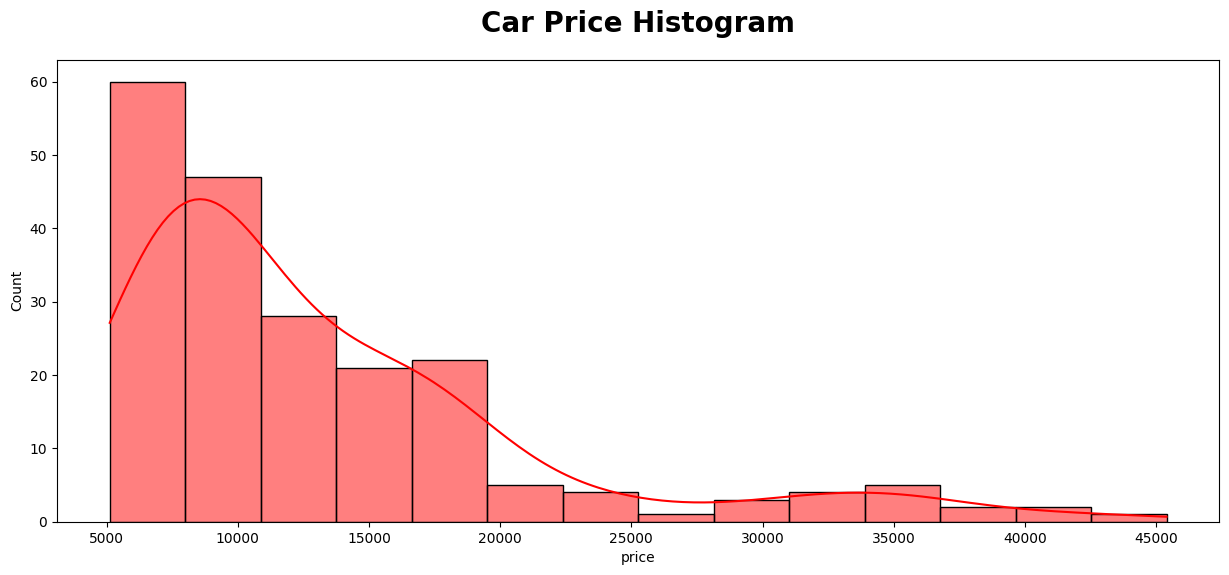

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(df["price"],color="red",kde=True)
plt.title("Car Price Histogram",fontweight="black",pad=20,fontsize=20)

## Visualize the distribution of car fuel types

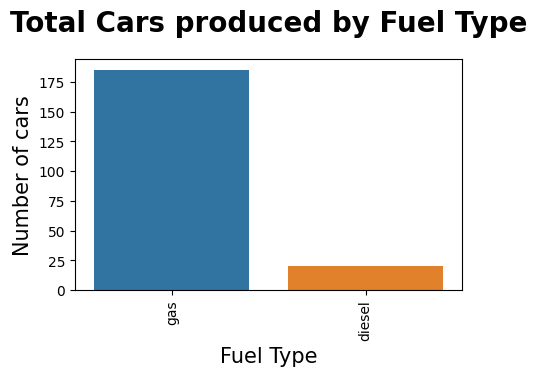

In [ ]:
plt.figure(figsize=(5,3))
counts = df["fueltype"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel("Fuel Type",fontsize=15)
plt.ylabel("Number of cars",fontsize=15)
plt.title("Total Cars produced by Fuel Type", pad=20, fontweight="black", fontsize=20)
plt.xticks(rotation=90)
plt.show()

# Group data by engine type and visualize the mean price for each engine type

<ipython-input-11-d9904f3190e8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_groupby_engineType = df.groupby(["enginetype"]).mean()


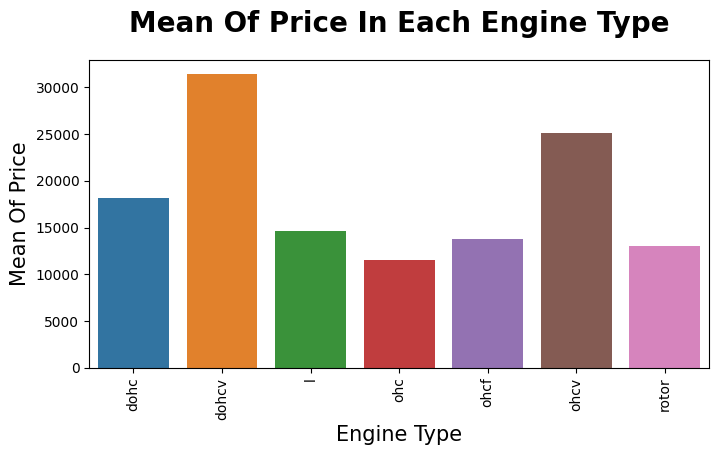

In [ ]:
df_groupby_engineType = df.groupby(["enginetype"]).mean()
plt.figure(figsize=(8,4))
price_mean = df_groupby_engineType.price
sns.barplot(x=df_groupby_engineType.index, y=price_mean)
plt.xlabel("Engine Type",fontsize=15)
plt.ylabel("Mean Of Price",fontsize=15)
plt.title("Mean Of Price In Each Engine Type", pad=20, fontweight="black", fontsize=20)
plt.xticks(rotation=90)
plt.show()

# Calculate and visualize the correlation matrix between numerical variables

<ipython-input-12-0f88bf0e9092>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= df.corr()


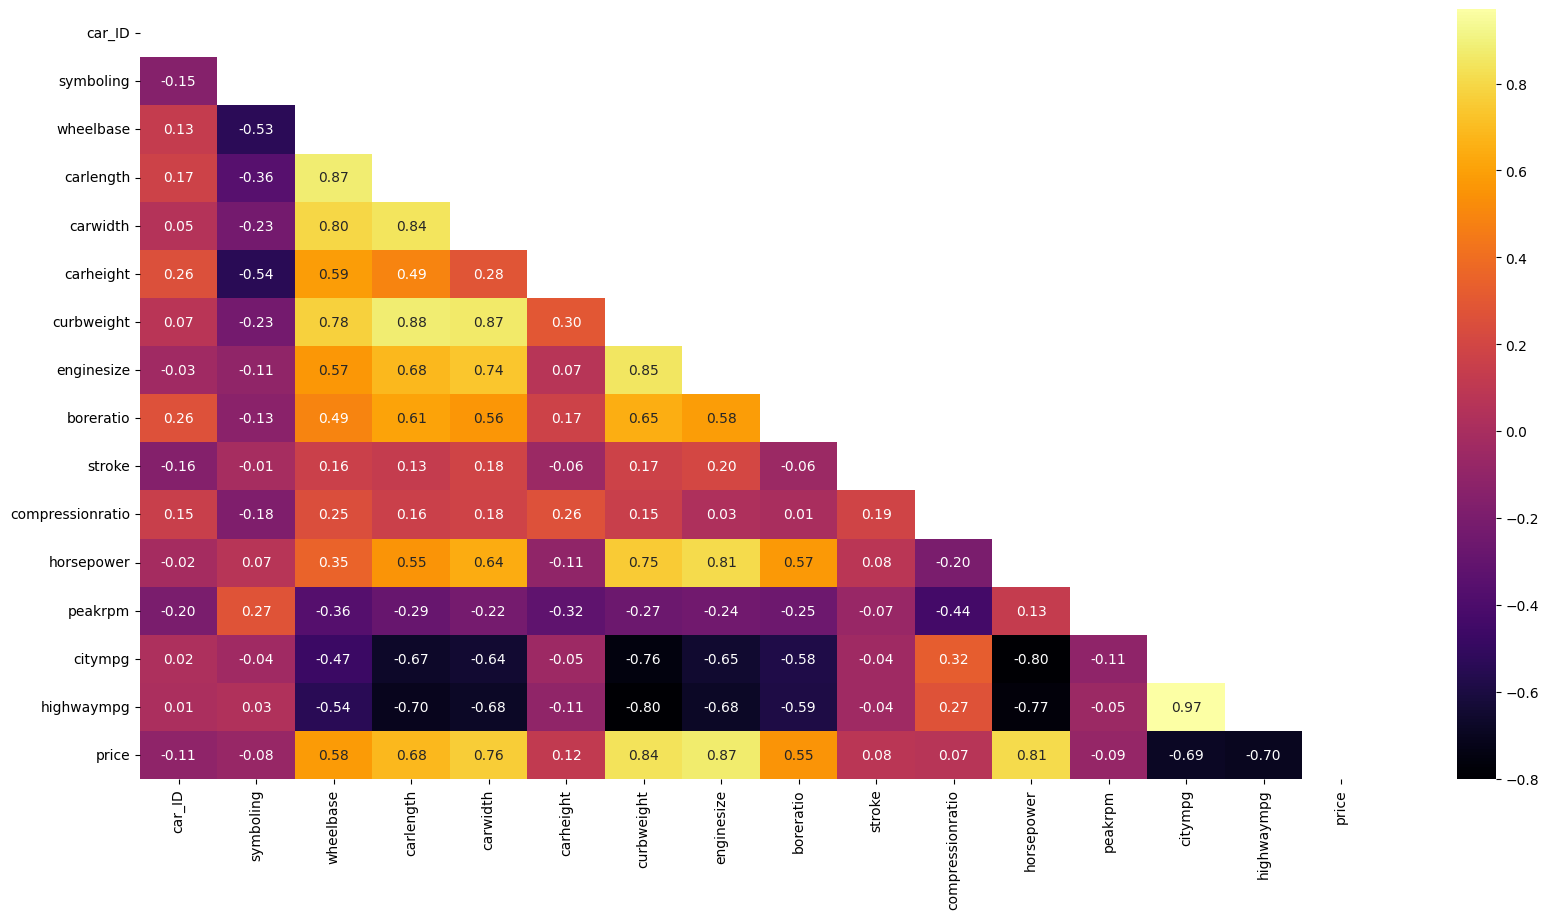

In [ ]:
corr= df.corr()
matrix = np.triu(corr)
plt.figure(figsize = (20,10))
sns.heatmap(corr, annot=True, mask=matrix, fmt = ".2f", cmap = 'inferno');

## Display the number of unique values for each column

In [ ]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [ ]:
df["carbody"].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

# Drop specific columns(features) from the dataset

In [7]:
df = df.drop(["symboling","compressionratio","car_ID","stroke"],axis=1)

## Replace specific values in the "fuelsystem" column

In [8]:
df["fuelsystem"] =  df["fuelsystem"].replace(['mpfi', 'mfi'], "fi")
df["fuelsystem"] =  df["fuelsystem"].replace(['1bbl', '2bbl','4bbl'], "bbl")
df["fuelsystem"] =  df["fuelsystem"].replace(['spdi', 'idi','4bbl'], "spfi")

# Reduce dim of the "CarName" Feature and Convert to one-Hot (Dummy var)
### Extract and process car company names, calculate mean prices, and categorize cars based on price range

In [9]:
Company_Name = df["CarName"].apply(lambda x: x.split(" ")[0])
df.insert(2,"CompanyName",Company_Name)
df.drop(columns=["CarName"],inplace=True)

In [10]:
z = round(df.groupby(["CompanyName"])["price"].agg(["mean"]),2).T
df = df.merge(z.T,how="left",on="CompanyName")
bins = [0,10000,20000,40000]
cars_bin=['Low','Medium','High']
df['CarsRange'] = pd.cut(df['mean'],bins,right=False,labels=cars_bin)
df = df.drop("CompanyName",axis=1)

df.dtypes

fueltype            object
aspiration          object
doornumber          object
carbody             object
drivewheel          object
enginelocation      object
wheelbase          float64
carlength          float64
carwidth           float64
carheight          float64
curbweight           int64
enginetype          object
cylindernumber      object
enginesize           int64
fuelsystem          object
boreratio          float64
horsepower           int64
peakrpm              int64
citympg              int64
highwaympg           int64
price              float64
mean               float64
CarsRange         category
dtype: object

In [11]:
df["CarsRange"] = pd.Series(df["CarsRange"], dtype="object")
t = df.dtypes
for i in t[t=="object"].index:
    one_hot_encod = pd.get_dummies(df[i], prefix=i)#,drop_first=True
    df = pd.concat([df,one_hot_encod],axis=1)
    df.drop(i,axis=1,inplace=True)
Y = df["price"].copy()
df = df.drop(['price', "mean"],axis=1)
# Split the dataset into train, validation, and test sets
x_train,x_test , y_train,y_test = train_test_split(df,Y,test_size=0.1, shuffle=True)
x_train,x_val , y_train,y_val = train_test_split(x_train,y_train,test_size=0.05)

# Scale the dataset using Min-Max scaling

In [12]:
sc = MinMaxScaler()
x_train_s = sc.fit_transform(x_train)
x_val_s   = sc.transform(x_val)
x_test_s    = sc.transform(x_test)


In [ ]:
x_train_s.shape

(174, 47)

In [ ]:
dfx_train_s = pd.DataFrame(x_train)

In [ ]:
x_train

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,horsepower,peakrpm,citympg,...,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_bbl,fuelsystem_fi,fuelsystem_spfi,CarsRange_High,CarsRange_Low,CarsRange_Medium
90,94.5,165.3,63.8,54.5,2017,103,2.99,55,4800,45,...,0,0,0,0,0,0,1,0,0,1
93,94.5,170.2,63.8,53.5,2024,97,3.15,69,5200,31,...,0,0,0,0,1,0,0,0,0,1
118,93.7,157.3,63.8,50.8,1918,90,2.97,68,5500,37,...,0,0,0,0,1,0,0,0,1,0
158,95.7,166.3,64.4,53.0,2275,110,3.27,56,4500,34,...,0,0,0,0,0,0,1,0,1,0
43,94.3,170.7,61.8,53.5,2337,111,3.31,78,4800,24,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,93.1,159.1,64.2,54.1,1905,91,3.03,68,5000,31,...,0,0,0,0,1,0,0,0,0,1
44,94.5,155.9,63.6,52.0,1874,90,3.03,70,5400,38,...,0,0,0,0,1,0,0,0,1,0
182,97.3,171.7,65.5,55.7,2261,97,3.01,52,4800,37,...,0,0,0,0,0,0,1,0,1,0
173,102.4,175.6,66.5,54.9,2326,122,3.31,92,4200,29,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
y_val = y_val.to_numpy()

# Train a Linear Regression model and evaluate its performance

In [13]:
lm = LinearRegression()
lm.fit(x_train_s,y_train)
lm.score(x_test_s,y_test)

0.9106024579120336

In [ ]:
x_train_s.shape

(174, 55)

# Part 1 : Design and Optimize by Keras Tuner
### Define a function to build and compile a neural network using Keras Tuner

In [41]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=x_train_s.shape[-1]))

    for i in range(hp.Int("num_layers",min_value=2, max_value=5, step=1)):
        model.add(
            keras.layers.Dense(

                units=hp.Int(f"units{i}", min_value=64, max_value=512, step=64),
                activation=hp.Choice("activation", ["selu","relu"]),
                kernel_initializer="normal"
            )
        )
    model.add(keras.layers.Dense(1,kernel_initializer="normal"))
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='mse',
        metrics=["mae",keras.metrics.RootMeanSquaredError()],
    )
    return model

# Perform hyperparameter tuning using Keras Tuner

In [42]:
tuner = keras_tuner.RandomSearch( build_model, objective='val_loss',max_trials=256, directory="drive/My Drive/Colab Notebooks/keras_tuner_car_price_kaggle")
tuner.search_space_summary()

Search space summary
Default search space size: 5
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
units0 (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 512, 'step': 64, 'sampling': 'linear'}
activation (Choice)
{'default': 'selu', 'conditions': [], 'values': ['selu', 'relu'], 'ordered': False}
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 512, 'step': 64, 'sampling': 'linear'}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [43]:
tuner.search(x_train_s, y_train, epochs=20, validation_data=(x_val_s, y_val))

Trial 256 Complete [00h 00m 07s]
val_loss: 70722352.0

Best val_loss So Far: 1137658.75
Total elapsed time: 00h 26m 05s


# Get the best model from the tuner

In [44]:
models = tuner.get_best_models()
best_model = models[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               24576     
                                                                 
 dense_1 (Dense)             (None, 320)               164160    
                                                                 
 dense_2 (Dense)             (None, 320)               102720    
                                                                 
 dense_3 (Dense)             (None, 384)               123264    
                                                                 
 dense_4 (Dense)             (None, 384)               147840    
                                                                 
 dense_5 (Dense)             (None, 1)                 385       
                                                                 
Total params: 562,945
Trainable params: 562,945
Non-trai

In [45]:
best_model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 47),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_1'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 512,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'RandomNormal',
     'config': {'mean': 0.0, 'stddev': 0.05, 'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 320,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'RandomNormal',
     'config': {'mean': 0.0, 'stddev': 0.05, 'seed': None}},

In [46]:
best_model.save("... /car_price_best_model.h5")

In [61]:
best_model = keras.models.load_model("... /car_price_best_model.h5")

# Part 1 : Fit the Optimum Model

# Fit the best model on the training data

In [62]:
history=best_model.fit(x_train_s, y_train, epochs=350, validation_data=(x_val_s, y_val))

Epoch 1/350
6/6 [==============================] - 1s 59ms/step - loss: 107894664.0000 - mae: 7485.3994 - root_mean_squared_error: 10387.2354 - val_loss: 227271840.0000 - val_mae: 12406.5996 - val_root_mean_squared_error: 15075.5381
Epoch 2/350
6/6 [==============================] - 0s 23ms/step - loss: 183886800.0000 - mae: 11825.7227 - root_mean_squared_error: 13560.4863 - val_loss: 220170208.0000 - val_mae: 12203.9141 - val_root_mean_squared_error: 14838.1338
Epoch 3/350
6/6 [==============================] - 0s 20ms/step - loss: 98977872.0000 - mae: 8393.8301 - root_mean_squared_error: 9948.7627 - val_loss: 52277868.0000 - val_mae: 6012.1836 - val_root_mean_squared_error: 7230.3438
Epoch 4/350
6/6 [==============================] - 0s 21ms/step - loss: 52582376.0000 - mae: 5424.4321 - root_mean_squared_error: 7251.3706 - val_loss: 76955472.0000 - val_mae: 7345.0884 - val_root_mean_squared_error: 8772.4268
Epoch 5/350
6/6 [==============================] - 0s 21ms/step - loss: 58915

# Part 1 : Result

In [32]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 320)               15360     
                                                                 
 dense_1 (Dense)             (None, 256)               82176     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 512)               66048     
                                                                 
 dense_4 (Dense)             (None, 448)               229824    
                                                                 
 dense_5 (Dense)             (None, 1)                 449       
                                                                 
Total params: 426,753
Trainable params: 426,753
Non-trai

Training MAE : 747285.1875
Validation MAE : 2852743.25


<Figure size 640x480 with 0 Axes>

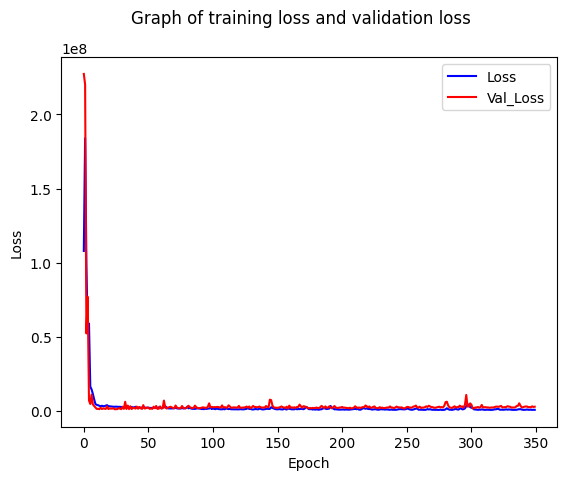

In [63]:
epochs = 350
print(f"Training MAE : {history.history['loss'][-1]}")
print(f"Validation MAE : {history.history['val_loss'][-1]}")
plt.clf()
fig = plt.figure()
fig.suptitle('Graph of training loss and validation loss')
plt.plot(range(epochs), history.history['loss'], color='b',label="Loss")
plt.plot(range(epochs), history.history['val_loss'], color='r',label="Val_Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# R-Square Score

In [64]:
from sklearn.metrics import r2_score
pred=best_model.predict(x_test_s)
r2_score(y_true=y_test,y_pred=pred)

1/1 [==============================] - 0s 83ms/step


0.9390260797920885